# 3.
##   3.1) “images/png/toysflash.png” görüntüsünü gri düzey bir görüntüye çevirip üzerine Gauss gürültüsü ekleyiniz. 
##   3.2) Eklediğiniz gürültüyü temizlemek için standart sağması 5 olan bir Gauss filtre oluşturunuz ve alçak geçirgen filtreleme işlemini gerçekleştiriniz.
##   3.3) Görüntünün orijinal, gürültü eklenmiş ve filtrelenmiş durumları için 3-B grafiğini çizdiriniz. 
##   3.4) Ardından filtrelenmiş görüntünün x ve y eksenlerindeki kısmi türevlerini hesaplayıp eğim genliği ve eğim açısı görüntülerini oluşturunuz. 
##   3.5) Açı görüntüsü içerisinden açısı 𝜋, 𝜋/2, 𝜋/3 ve 2𝜋/3 olan açıları çekip ayrı görüntüler oluşturunuz ve ekrana bastırınız. 
##   3.6) Açı görüntülerinin genlik görüntüsüne bağlı olarak nasıl oluştuğunu değerlendiriniz.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import img_read, show_hist

##   3.1) “images/png/toysflash.png” görüntüsünü gri düzey bir görüntüye çevirip üzerine Gauss gürültüsü ekleyiniz. 

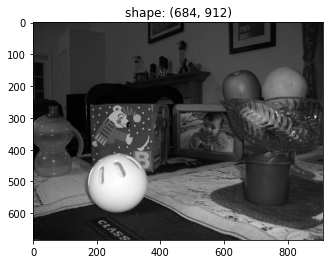

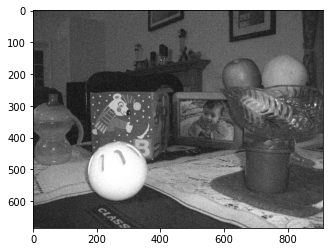

In [2]:
img_org = img_read('../images/png/toysflash.png', ret_gray=True)

def add_noise(img, noise_mult=0.2):
    noise = np.random.randint(0, 256, img.shape)
    noisy = np.clip(img + noise_mult*noise, 0, 255)
    return noisy

img_noise = add_noise(img_org,  noise_mult=0.2)


##   3.2) Eklediğiniz gürültüyü temizlemek için standart sağması 5 olan bir Gauss filtre oluşturunuz ve alçak geçirgen filtreleme işlemini gerçekleştiriniz.

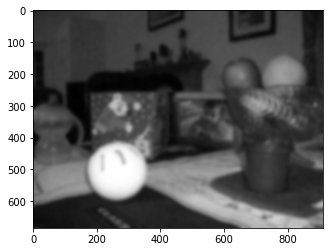

In [4]:
import scipy.ndimage
lowpass = scipy.ndimage.gaussian_filter(img_noise, 5)

##   3.3) Görüntünün orijinal, gürültü eklenmiş ve filtrelenmiş durumları için 3-B grafiğini çizdiriniz. 

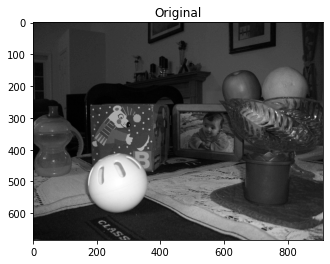

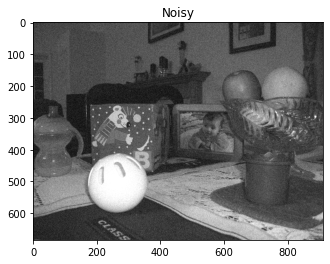

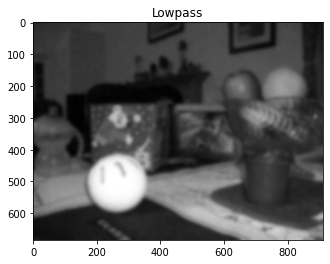

In [5]:
plt.imshow(img_org, cmap='gray')
plt.title('Original')
plt.show()

plt.imshow(img_noise, cmap='gray')
plt.title('Noisy')
plt.show()

plt.imshow(lowpass, cmap='gray')
plt.title('Lowpass')
plt.show()

##   3.4) Ardından filtrelenmiş görüntünün x ve y eksenlerindeki kısmi türevlerini hesaplayıp eğim genliği ve eğim açısı görüntülerini oluşturunuz. 

### http://www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/
### https://www.w3resource.com/python-exercises/numpy/python-numpy-random-exercise-14.php

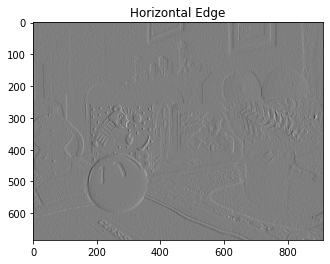

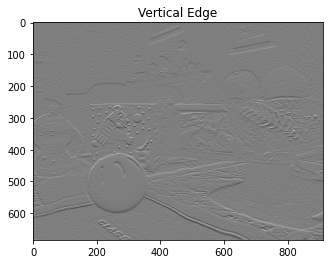

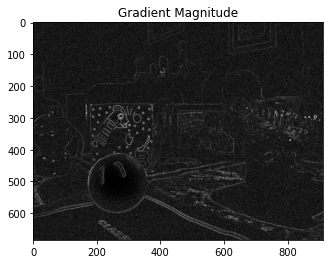

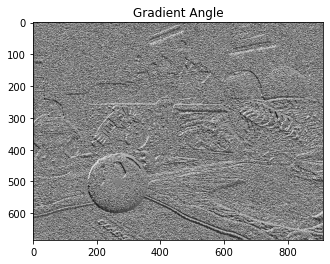

In [25]:
def sobel_edge_detection(image, filter, verbose=False):
    #new_image_x = convolution(image, filter, verbose)
    new_image_x = cv2.filter2D(image, -1, filter)
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
        
    #new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
    new_image_y = cv2.filter2D(image,-1, np.flip(filter.T, axis=0))
    
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
    
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    gradient_angle = np.arctan2(new_image_y, new_image_x)
     
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
        
        plt.imshow(gradient_angle, cmap='gray')
        plt.title("Gradient Angle")
        plt.show()
    
    return gradient_magnitude, gradient_angle
        
gradient_magnitude, gradient_angle = sobel_edge_detection(img_noise, np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]), verbose=True)

##   3.5) Açı görüntüsü içerisinden açısı 𝜋, 𝜋/2, 𝜋/3 ve 2𝜋/3 olan açıları çekip ayrı görüntüler oluşturunuz ve ekrana bastırınız. 


In [24]:
import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

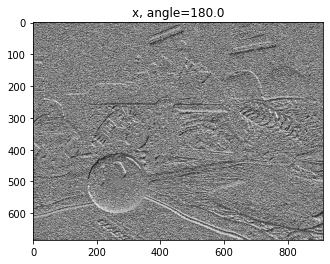

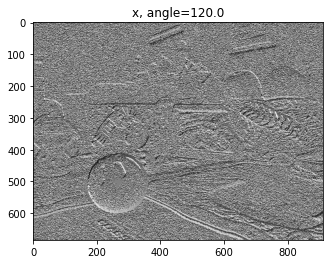

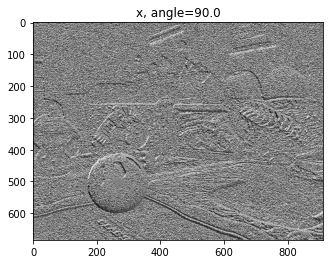

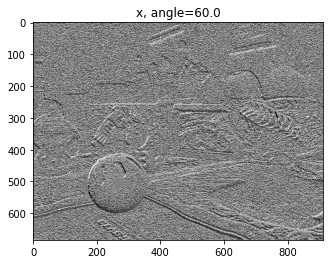

In [43]:
PI = np.pi

angles = [PI, 2*PI/3, PI/2, PI/3,]

for angle in angles:
    x, y = pol2cart(gradient_angle, angle)
    
    plt.imshow(x, cmap='gray')
    plt.title(f"x, angle={(angle/PI)*180}")
    plt.show()
    """ plt.imshow(y, cmap='gray')
    plt.title(f"y, angle={(angle/PI)*180}")
    plt.show()"""


##   3.6) Açı görüntülerinin genlik görüntüsüne bağlı olarak nasıl oluştuğunu değerlendiriniz.